In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import os
import glob
from os import walk
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.gridspec import GridSpec
from IPython.display import display, clear_output
from labexp import experiments

from mpl_toolkits.axes_grid1 import make_axes_locatable,ImageGrid
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.gridspec import GridSpec
plt.style.use('/media/labfiles/lab-codes/plotstyle.mplstyle')

In [2]:
exp3 = experiments(1,'nano','afm','grating_InP')

|  No. Dir  | Name Dir                                        |  No. files  |
|-----------|-------------------------------------------------|-------------|
|     0     | nano/grating_InP/exp_2021-11/exp_04-11_afm      |      3      |
|     1     | nano/grating_InP/exp_2021-11/exp_06-11_afm      |      2      |
|     2     | nano/grating_InP/exp_2022-01/exp_2022_13_01_afm |      3      |
|     3     | nano/grating_InP/exp_2022-01/exp_2022_14_01_afm |      1      |
|     4     | nano/grating_InP/exp_2022-01/exp_2022_19_01_afm |      2      |


In [3]:
exp1=exp3.data[4][0][:,1:].T; exp2=exp3.data[4][1][:,1:].T

In [4]:
def CorrImag(datIm,grade,offset):

    ImRes=np.zeros(datIm.shape)

    for i in range(ImRes.shape[0]):
        datnum=np.array(datIm[i,:])
    
        x=np.arange(0,datnum.size)
        a,b =np.polyfit(x,datnum,grade)
        fit=a*x+b
        ImRes[i,:]=fit-datnum+offset
    return ImRes

In [5]:
ImRes=CorrImag(exp1,1,2000)
ImRes2=CorrImag(exp2,1,2000)

# First image without correction

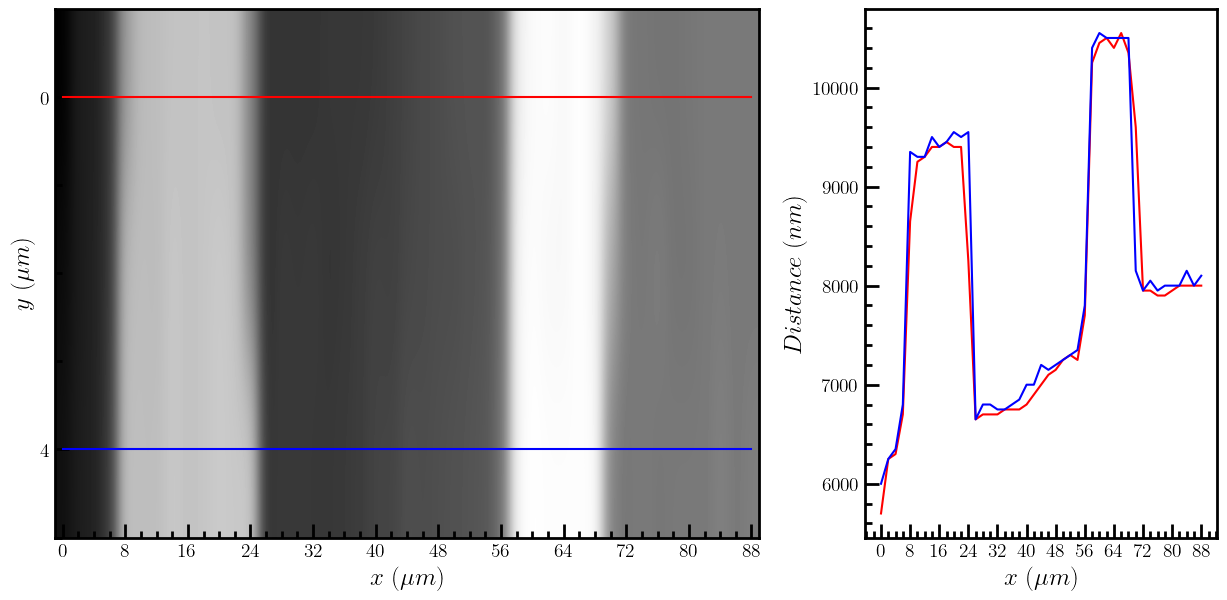

In [6]:
fig = plt.figure(figsize=(15, 7))
gs = GridSpec(1, 2, figure=fig,wspace=0.2,width_ratios=[2,1])

ax1 = fig.add_subplot(gs[0, 0])
ax2 =fig.add_subplot(gs[0, 1])

npix1=0
npix2=2
#npix3=3

ax1.imshow(exp1[:,1:],cmap='gray',aspect='auto',interpolation='gaussian')
ax1.plot([0,44],[npix1,npix1],'r')
ax1.plot([0,44],[npix2,npix2],'b')
#ax1.plot([0,10],[npix3,npix3],'k')


ax1.set_xlabel(" $x$ $(\mu m)$")
ax1.set_xticks(np.arange(0,45,4))
ax1.set_xticklabels(np.arange(0,90,8))
ax1.set_ylabel(" $y$ $(\mu m)$")
ax1.set_yticks(np.arange(0,4,2))
ax1.set_yticklabels(np.arange(0,8,4))

ax2.set_xlabel(" $x$ $(\mu m)$")
ax2.set_xticks(np.arange(0,45,4))
ax2.set_xticklabels(np.arange(0,90,8))
ax2.set_ylabel(" $Distance$ $(n m)$")
ax2.plot(exp1[npix1,1:],'r')
ax2.plot(exp1[npix2,1:],'b')

plt.show()

# First image with correction

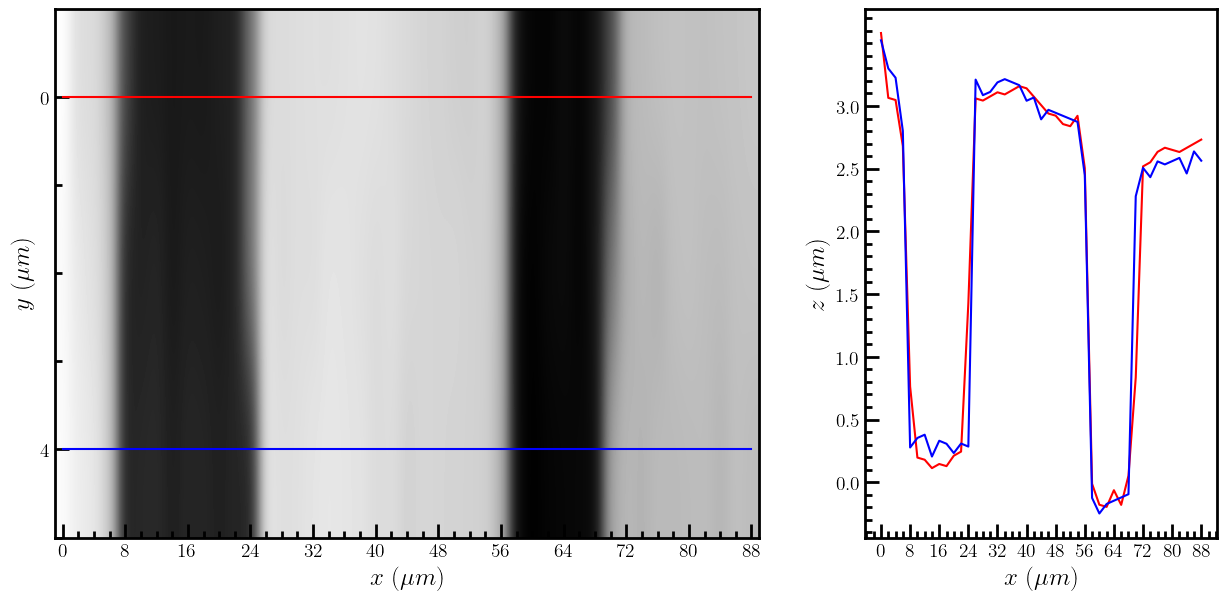

In [9]:
fig = plt.figure(figsize=(15, 7))
gs = GridSpec(1, 2, figure=fig,wspace=0.2,width_ratios=[2,1])

ax1 = fig.add_subplot(gs[0, 0])
ax2 =fig.add_subplot(gs[0, 1])

npix1=0
npix2=2
#npix3=3

ax1.imshow(ImRes[:,1:],cmap='gray',aspect='auto',interpolation='gaussian')
ax1.plot([0,44],[npix1,npix1],'r')
ax1.plot([0,44],[npix2,npix2],'b')
#ax1.plot([0,10],[npix3,npix3],'k')


ax1.set_xlabel(" $x$ $(\mu m)$")
ax1.set_xticks(np.arange(0,45,4))
ax1.set_xticklabels(np.arange(0,90,8))
ax1.set_ylabel(" $y$ $(\mu m)$")
ax1.set_yticks(np.arange(0,4,2))
ax1.set_yticklabels(np.arange(0,8,4))

ax2.set_xlabel(" $x$ $(\mu m)$")
ax2.set_xticks(np.arange(0,45,4))
ax2.set_xticklabels(np.arange(0,90,8))
ax2.set_ylabel(" $z$ $(\mu m)$")
ax2.set_yticks(np.arange(0,3500,500))
ax2.set_yticklabels(np.arange(0,3.5,0.5))
ax2.plot(ImRes[npix1,1:],'r')
ax2.plot(ImRes[npix2,1:],'b')

plt.show()

# Second image without correction

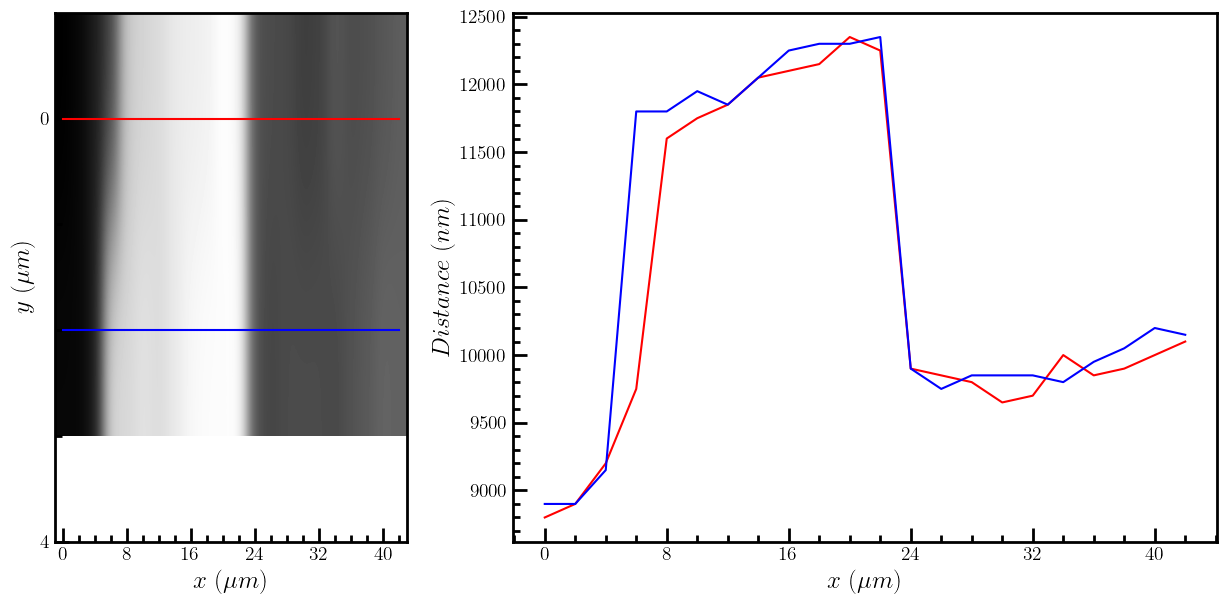

In [11]:
fig = plt.figure(figsize=(15, 7))
gs = GridSpec(1, 2, figure=fig,wspace=0.2,width_ratios=[1,2])

ax1 = fig.add_subplot(gs[0, 0])
ax2 =fig.add_subplot(gs[0, 1])

npix1=0
npix2=1

ax1.imshow(exp2[:,1:],cmap='gray',aspect='auto',interpolation='gaussian')
ax1.plot([0,21],[npix1,npix1],'r')
ax1.plot([0,21],[npix2,npix2],'b')


ax1.set_xlabel(" $x$ $(\mu m)$")
ax1.set_xticks(np.arange(0,22,4))
ax1.set_xticklabels(np.arange(0,44,8))
ax1.set_ylabel(" $y$ $(\mu m)$")
ax1.set_yticks(np.arange(0,4,2))
ax1.set_yticklabels(np.arange(0,8,4))

ax2.set_xlabel(" $x$ $(\mu m)$")
ax2.set_xticks(np.arange(0,45,4))
ax2.set_xticklabels(np.arange(0,90,8))
ax2.set_ylabel(" $Distance$ $(n m)$")
ax2.plot(exp2[npix1,1:],'r')
ax2.plot(exp2[npix2,1:],'b')

plt.show()

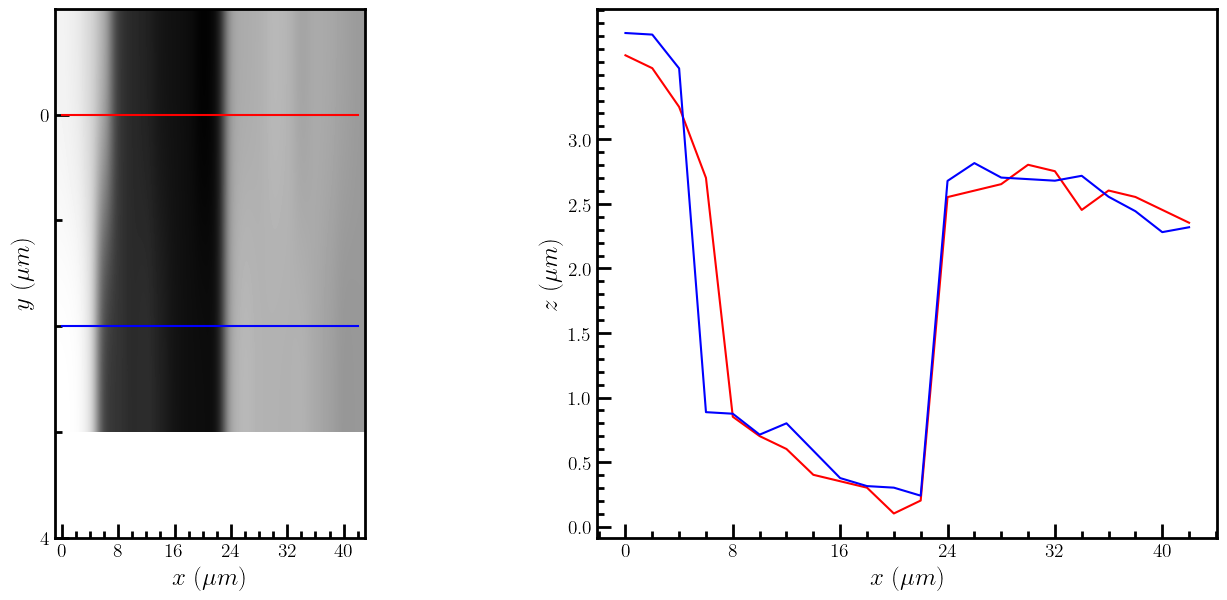

In [12]:
fig = plt.figure(figsize=(15, 7))
gs = GridSpec(1, 2, figure=fig,wspace=0.5,width_ratios=[1,2])

ax1 = fig.add_subplot(gs[0, 0])
ax2 =fig.add_subplot(gs[0, 1])

npix1=0
npix2=1

ax1.imshow(ImRes2[:,1:],cmap='gray',aspect='auto',interpolation='gaussian')
ax1.plot([0,21],[npix1,npix1],'r')
ax1.plot([0,21],[npix2,npix2],'b')


ax1.set_xlabel(" $x$ $(\mu m)$")
ax1.set_xticks(np.arange(0,22,4))
ax1.set_xticklabels(np.arange(0,44,8))
ax1.set_ylabel(" $y$ $(\mu m)$")
ax1.set_yticks(np.arange(0,4,2))
ax1.set_yticklabels(np.arange(0,8,4))

ax2.set_xlabel(" $x$ $(\mu m)$")
ax2.set_xticks(np.arange(0,45,4))
ax2.set_xticklabels(np.arange(0,90,8))
ax2.set_ylabel(" $z$ $(\mu m)$")
ax2.set_yticks(np.arange(0,3500,500))
ax2.set_yticklabels(np.arange(0,3.5,0.5))
ax2.plot(ImRes2[npix1,1:],'r')
ax2.plot(ImRes2[npix2,1:],'b')

plt.show()